In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data=np.load('data.npy')
target=np.load('target.npy')

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

In [21]:
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [23]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6677 - accuracy: 0.7500 - val_loss: 0.2052 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.7264 - accuracy: 0.7500 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 68ms/step - loss: 0.7696 - accuracy: 0.7500 - val_loss: 0.4801 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 0.6281 - accuracy: 0.7500 - val_loss: 0.6341 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 54ms/step - loss: 0.5837 - accuracy: 1.0000 - val_loss: 0.4504 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 64ms/step - loss: 0.5195 - accuracy: 0.7500 - val_loss: 0.2407 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 55ms/step - loss: 0.4346 - accuracy: 0.7500 - val_loss: 0.2621 - val_accuracy: 1.0000
Epoch 8/20
1/1 [===============

KeyboardInterrupt: 

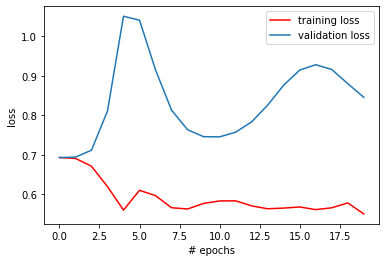

In [12]:

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

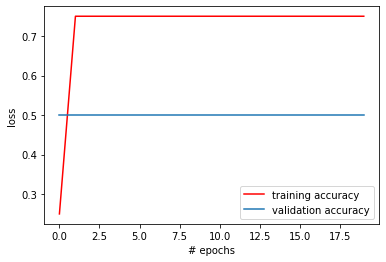

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
print(model.evaluate(test_data,test_target))

1/1 [==============================] - 0s 998us/step - loss: 0.2793 - accuracy: 1.0000
[0.2793106734752655, 1.0]
